In [49]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import dateutil
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly

In [50]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

In [51]:
tst_d = pd.read_csv('data/full-list-covid-19-tests-per-day.csv')
tst_t = pd.read_csv('data/full-list-total-tests-for-covid-19.csv')
deaths_w = pd.read_csv('data/total_deaths.csv')
cases_w = pd.read_csv('data/total_cases.csv')

In [52]:
with open('data/india/all_totals.json') as f:
    ind_tot = json.load(f)

In [53]:
with open('data/india/total_confirmed_cases.json') as f:
    ind_con = json.load(f)

In [54]:
with open('data/india/icmr_testing_status.json') as f:
    ind_tst = json.load(f)

In [55]:
active = pd.DataFrame(columns=['date', 'active_cases'])

for row in ind_con['rows']:
    if row['key'][1] == 'total_confirmed':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'active_cases']
        active = active.append(temp, ignore_index=True)

In [56]:
cured = pd.DataFrame(columns=['date', 'cured'])

for row in ind_tot['rows']:
    if row['key'][1] == 'cured':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'cured']
        cured = cured.append(temp, ignore_index=True)

In [57]:
death = pd.DataFrame(columns=['date', 'death'])

for row in ind_tot['rows']:
    if row['key'][1] == 'death':
        temp = pd.DataFrame([[row['key'][0], row['value']]])
        temp.columns = ['date', 'death']
        death = death.append(temp, ignore_index=True)

In [58]:
india_tests = pd.DataFrame(columns=['date', 'tests'])

for row in ind_tst['rows']:
    temp = pd.DataFrame([[row['value']['report_time'], row['value']['samples']]])
    temp.columns = ['date', 'tests']
    india_tests = india_tests.append(temp, ignore_index=True)

In [59]:
t = pd.merge(active, cured, on='date')
india_totals = pd.merge(t, death, on='date')

In [60]:
india_totals['date_read'] = india_totals['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
india_tests['date_read'] = india_tests['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))

In [61]:
india_totals['dup1'] = (~india_totals['date_read'].duplicated(keep='last')).astype(int)
india_totals['dup1'] = np.where(india_totals['date_read'].duplicated(keep='last'), 0, 1)
india_totals = india_totals[india_totals['dup1'] == 1]

In [62]:
india_tests['dup1'] = (~india_tests['date_read'].duplicated(keep='last')).astype(int)
india_tests['dup1'] = np.where(india_tests['date_read'].duplicated(keep='last'), 0, 1)
india_tests = india_tests[india_tests['dup1'] == 1]

In [63]:
india_totals.head()

,date,active_cases,cured,death,date_read,dup1
0,2020-01-30T13:33:00.00+05:30,1,0,0,"Jan 30, 2020",1
1,2020-02-02T10:39:00.00+05:30,2,0,0,"Feb 2, 2020",1
2,2020-02-03T12:13:00.00+05:30,3,0,0,"Feb 3, 2020",1
3,2020-03-02T14:28:00.00+05:30,5,0,0,"Mar 2, 2020",1
4,2020-03-03T19:36:00.00+05:30,6,0,0,"Mar 3, 2020",1


In [71]:
india_tests

,date,tests,date_read,dup1
0,2020-03-13T10:00:00.00+05:30,6500,"Mar 13, 2020",1
1,2020-03-18T18:00:00.00+05:30,13125,"Mar 18, 2020",1
2,2020-03-19T18:00:00.00+05:30,14175,"Mar 19, 2020",1
3,2020-03-20T18:00:00.00+05:30,15404,"Mar 20, 2020",1
4,2020-03-21T10:00:00.00+05:30,15701,"Mar 21, 2020",1
5,2020-03-22T10:00:00.00+05:30,16999,"Mar 22, 2020",1
6,2020-03-23T20:00:00.00+05:30,20707,"Mar 23, 2020",1
7,2020-03-24T10:00:00.00+05:30,20864,"Mar 24, 2020",1
8,2020-03-25T20:00:00.00+05:30,25144,"Mar 25, 2020",1
9,2020-03-27T09:00:00.00+05:30,27688,"Mar 27, 2020",1


In [73]:
daily_tests = pd.read_csv('data/full-list-covid-19-tests-per-day.csv')

In [76]:
india_daily_tests = daily_tests[daily_tests['Entity']=='India']

In [82]:
india_daily_tests = india_daily_tests.reset_index(drop=True)

In [87]:
india_daily_tests_cases = pd.merge(india_daily_tests, india_totals, left_on='Date', right_on='date_read')

In [88]:
india_daily_tests_cases.head()

,Entity,Code,Date,Daily change in cumulative total tests,date,active_cases,cured,death,date_read,dup1
0,India,IND,"Mar 19, 2020",191,2020-03-19T17:00:00.00+05:30,173,20,4,"Mar 19, 2020",1
1,India,IND,"Mar 20, 2020",1060,2020-03-20T17:00:00.00+05:30,223,23,4,"Mar 20, 2020",1
2,India,IND,"Mar 21, 2020",1325,2020-03-21T16:45:00.00+05:30,283,23,4,"Mar 21, 2020",1
3,India,IND,"Mar 22, 2020",1298,2020-03-22T18:30:00.00+05:30,360,24,7,"Mar 22, 2020",1
4,India,IND,"Mar 23, 2020",3708,2020-03-23T20:15:00.00+05:30,434,35,9,"Mar 23, 2020",1


In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=india_daily_tests_cases['active_cases'], y=india_daily_tests_cases['Daily change in cumulative total tests'],
                         mode='lines+markers', name='India'))

fig.update_layout(title='Daily cases tested for COVID-19 against total number of confirmed cases (As of Apr 9, 2020)',
                   xaxis_title='Total number of confirmed cases',
                   yaxis_title='Daily cases tested')

fig.update_layout(
    autosize=False,
    width=1200,
    height=900,)

fig.show()

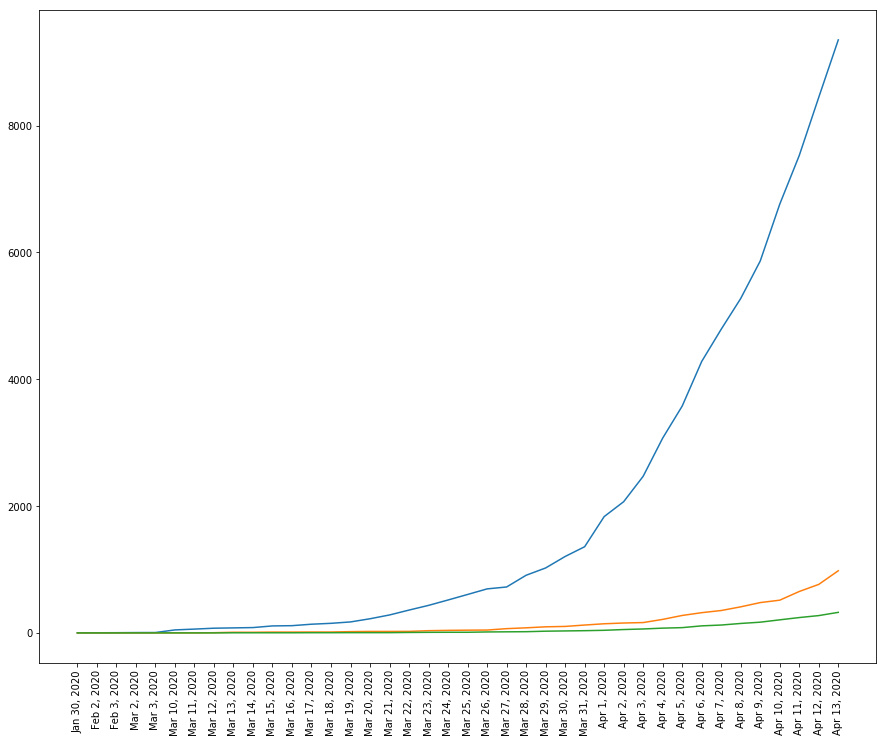

In [64]:
plt.plot(india_totals['date_read'], india_totals['active_cases'])
plt.plot(india_totals['date_read'], india_totals['cured'])
plt.plot(india_totals['date_read'], india_totals['death'])
plt.xticks(india_totals['date_read'], india_totals['date_read'], rotation='vertical')
plt.show()

In [65]:
tst_t = pd.read_csv('data/full-list-total-tests-for-covid-19.csv')

In [66]:
t = tst_t[tst_t['Entity'].str.contains('India')][['Date', 'Cumulative total tests']]

In [67]:
tst_t

,Entity,Code,Date,Cumulative total tests
0,Australia,AUS,"Mar 22, 2020",143056
1,Australia,AUS,"Mar 29, 2020",211261
2,Australia,AUS,"Apr 2, 2020",261000
3,Australia,AUS,"Apr 3, 2020",277278
4,Australia,AUS,"Apr 6, 2020",302759
5,Australia,AUS,"Apr 7, 2020",310797
6,Australia,AUS,"Apr 8, 2020",319368
7,Australia,AUS,"Apr 9, 2020",330134
8,Australia,AUS,"Apr 10, 2020",338346
9,Austria,AUT,"Feb 25, 2020",218


In [68]:
india_tests = india_tests.reset_index(drop=True)

In [69]:
india_test_totals = pd.merge(india_tests, india_totals, on='date_read')

In [86]:
india_daily_tests

,Entity,Code,Date,Daily change in cumulative total tests
0,India,IND,"Mar 19, 2020",191
1,India,IND,"Mar 20, 2020",1060
2,India,IND,"Mar 21, 2020",1325
3,India,IND,"Mar 22, 2020",1298
4,India,IND,"Mar 23, 2020",3708
5,India,IND,"Mar 24, 2020",157
6,India,IND,"Mar 25, 2020",4280
7,India,IND,"Apr 1, 2020",5163
8,India,IND,"Apr 4, 2020",10705
9,India,IND,"Apr 5, 2020",9584


In [85]:
india_test_totals.head()

,date_x,tests,date_read,dup1_x,date_y,active_cases,cured,death,dup1_y
0,2020-03-13T10:00:00.00+05:30,6500,"Mar 13, 2020",1,2020-03-13T22:15:00.00+05:30,79,10,2,1
1,2020-03-18T18:00:00.00+05:30,13125,"Mar 18, 2020",1,2020-03-18T17:15:00.00+05:30,151,14,3,1
2,2020-03-19T18:00:00.00+05:30,14175,"Mar 19, 2020",1,2020-03-19T17:00:00.00+05:30,173,20,4,1
3,2020-03-20T18:00:00.00+05:30,15404,"Mar 20, 2020",1,2020-03-20T17:00:00.00+05:30,223,23,4,1
4,2020-03-21T10:00:00.00+05:30,15701,"Mar 21, 2020",1,2020-03-21T16:45:00.00+05:30,283,23,4,1


In [70]:
india_test_totals

,date_x,tests,date_read,dup1_x,date_y,active_cases,cured,death,dup1_y
0,2020-03-13T10:00:00.00+05:30,6500,"Mar 13, 2020",1,2020-03-13T22:15:00.00+05:30,79,10,2,1
1,2020-03-18T18:00:00.00+05:30,13125,"Mar 18, 2020",1,2020-03-18T17:15:00.00+05:30,151,14,3,1
2,2020-03-19T18:00:00.00+05:30,14175,"Mar 19, 2020",1,2020-03-19T17:00:00.00+05:30,173,20,4,1
3,2020-03-20T18:00:00.00+05:30,15404,"Mar 20, 2020",1,2020-03-20T17:00:00.00+05:30,223,23,4,1
4,2020-03-21T10:00:00.00+05:30,15701,"Mar 21, 2020",1,2020-03-21T16:45:00.00+05:30,283,23,4,1
5,2020-03-22T10:00:00.00+05:30,16999,"Mar 22, 2020",1,2020-03-22T18:30:00.00+05:30,360,24,7,1
6,2020-03-23T20:00:00.00+05:30,20707,"Mar 23, 2020",1,2020-03-23T20:15:00.00+05:30,434,35,9,1
7,2020-03-24T10:00:00.00+05:30,20864,"Mar 24, 2020",1,2020-03-24T20:15:00.00+05:30,519,40,10,1
8,2020-03-25T20:00:00.00+05:30,25144,"Mar 25, 2020",1,2020-03-25T18:45:00.00+05:30,606,43,10,1
9,2020-03-27T09:00:00.00+05:30,27688,"Mar 27, 2020",1,2020-03-27T09:15:00.00+05:30,724,67,17,1


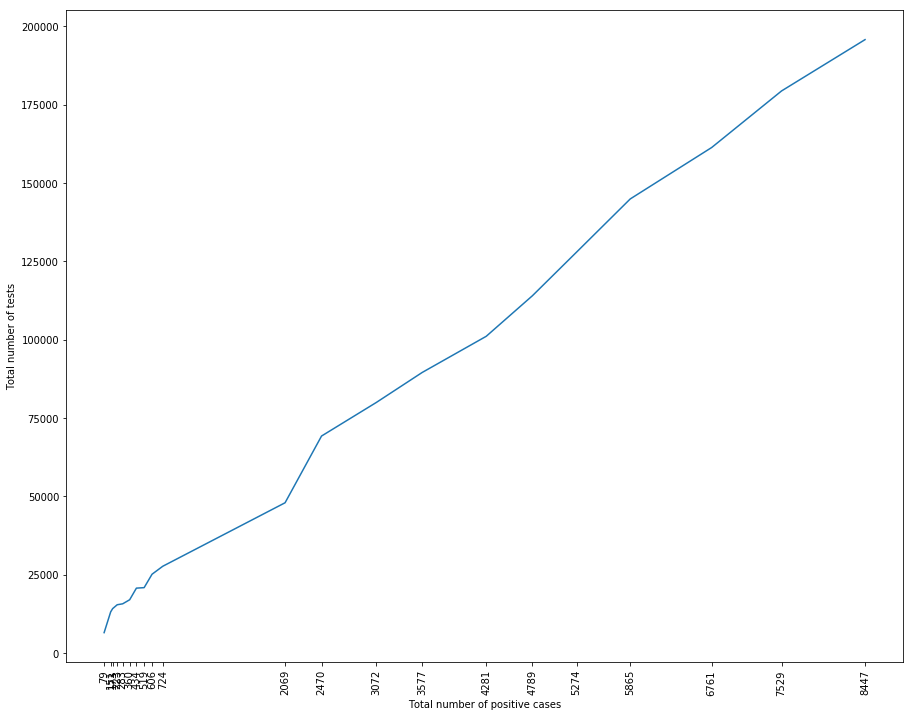

In [28]:
plt.plot(india_test_totals['active_cases'], india_test_totals['tests'])
plt.xticks(india_test_totals['active_cases'], india_test_totals['active_cases'], rotation='vertical')
plt.xlabel('Total number of positive cases')
plt.ylabel('Total number of tests')
plt.show()

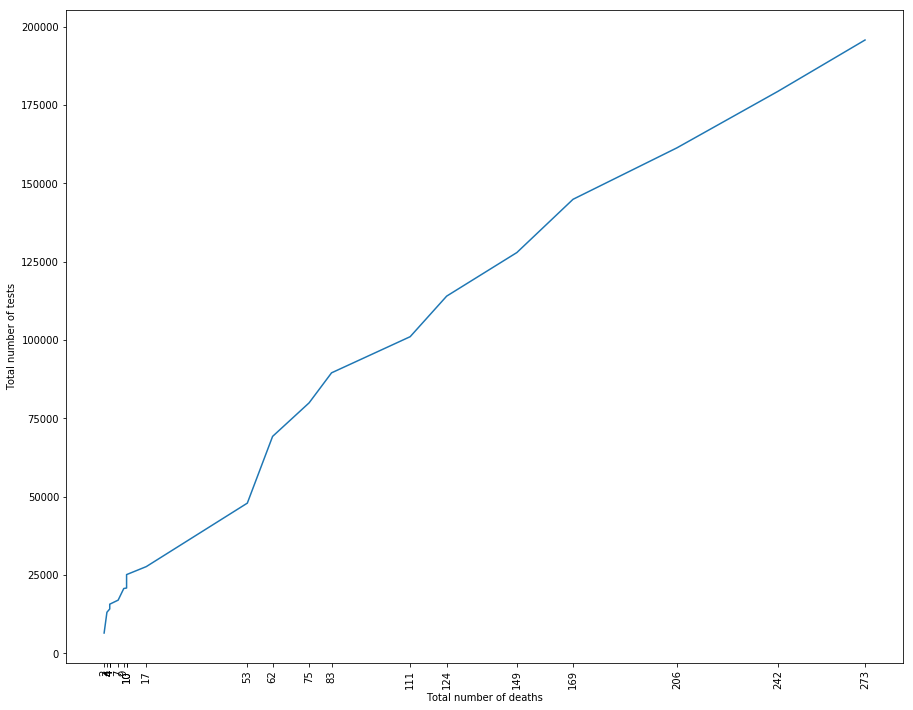

In [29]:
plt.plot(india_test_totals['death'], india_test_totals['tests'])
plt.xticks(india_test_totals['death'], india_test_totals['death'], rotation='vertical')
plt.xlabel('Total number of deaths')
plt.ylabel('Total number of tests')
plt.show()

In [91]:
def get_country_stats(c, query, cases_w, deaths_w, tst_t):
    cases = cases_w[['date', c]]
    deaths = deaths_w[['date', c]]
    tests = tst_t[tst_t['Entity'].str.contains(c)]
    if query:
        tests = tests[tests['Code']==query]
    
    tests = tests[['Date', 'Cumulative total tests']]
    
    tests['date_read'] = tests['Date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    cases['date_read'] = cases['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    deaths['date_read'] = deaths['date'].apply(lambda x: dateutil.parser.parse(x).strftime("%b %-d, %Y"))
    
    test_cases = pd.merge(tests, cases, on='date_read')
    test_deaths = pd.merge(tests, deaths, on='date_read')
    
    return test_cases, test_deaths

In [112]:
usa_test_cases, usa_test_deaths = get_country_stats('United States', 'USA', cases_w, deaths_w, tst_t)
sk_test_cases, sk_test_deaths = get_country_stats('South Korea', '', cases_w, deaths_w, tst_t)
india_test_cases, india_test_deaths = get_country_stats('India', '', cases_w, deaths_w, tst_t)
italy_test_cases, italy_test_deaths = get_country_stats('Italy', '', cases_w, deaths_w, tst_t)
pk_test_cases, pk_test_deaths = get_country_stats('Pakistan', '', cases_w, deaths_w, tst_t)

/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/aman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [114]:
sk_test_cases = sk_test_cases[:65]
sk_test_deaths = sk_test_deaths[:50]

In [115]:
usa_test_cases = usa_test_cases[:24]
usa_test_deaths = usa_test_deaths[:23]

In [116]:
italy_test_cases = italy_test_cases[:21]
italy_test_deaths = italy_test_deaths[:14]

In [120]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sk_test_cases['South Korea'], y=sk_test_cases['Cumulative total tests'],
                         mode='lines+markers', name='South Korea'))

fig.add_trace(go.Scatter(x=india_test_totals['active_cases'], y=india_test_totals['tests'],
                         mode='lines+markers', name='India'))

fig.add_trace(go.Scatter(x=usa_test_cases['United States'], y=usa_test_cases['Cumulative total tests'],
                         mode='lines+markers', name='USA'))

fig.add_trace(go.Scatter(x=italy_test_cases['Italy'], y=italy_test_cases['Cumulative total tests'],
                         mode='lines+markers', name='Italy'))

# fig.add_trace(go.Scatter(x=pk_test_cases['Pakistan'], y=pk_test_cases['Cumulative total tests'],
#                          mode='lines+markers', name='Pakisatan'))

fig.update_layout(title='Total tests for COVID-19 against total number of confirmed cases (As of Apr 11, 2020)',
                   xaxis_title='Total number of confirmed cases',
                   yaxis_title='Total number of cases tested')

# Add shapes
fig.add_shape(
        # Line Vertical
        dict(
            type="line",
            x0=8000,
            y0=0,
            x1=8000,
            y1=300000,
            line=dict(
                color="RoyalBlue",
                width=1
            )
))

fig.update_layout(
    autosize=False,
    width=1200,
    height=900,)

fig.show()

In [ ]:
plt.plot(usa_test_cases['United States'], usa_test_cases['Cumulative total tests'], label='USA')
plt.plot(india_test_totals['active_cases'], india_test_totals['tests'], label='India')
plt.plot(sk_test_cases['South Korea'], sk_test_cases['Cumulative total tests'], label='South Korea')
plt.plot(italy_test_cases['Italy'], italy_test_cases['Cumulative total tests'], label='Italy')
plt.plot(pk_test_cases['Pakistan'], pk_test_cases['Cumulative total tests'], label='Pakistan')
plt.legend(loc="upper left")
plt.title('As of April 10 for India. Axes have been truncated for other countries for the sake of comparision.', fontsize=12)
# plt.title('As of April 6', fontsize=12)

# plt.xticks(usa_test_cases['United States'], usa_test_cases['United States'], rotation='vertical')
plt.xlabel('Total number of positive cases')
plt.ylabel('Total number of tests')
plt.show()

In [ ]:
plt.plot(usa_test_deaths['United States'], usa_test_deaths['Cumulative total tests'], label='USA')
plt.plot(india_test_totals['death'], india_test_totals['tests'], label='India')
plt.plot(sk_test_deaths['South Korea'], sk_test_deaths['Cumulative total tests'], label='South Korea')
plt.plot(italy_test_deaths['Italy'], italy_test_deaths['Cumulative total tests'], label='Italy')
plt.plot(pk_test_deaths['Pakistan'], pk_test_deaths['Cumulative total tests'], label='Pakistan')
plt.legend(loc="upper left")
plt.title('As of April 9 for India. Axes have been truncated for other countries for the sake of comparision.', fontsize=12)
# plt.title('As of April 6', fontsize=12)
# plt.xticks(usa_test_cases['United States'], usa_test_cases['United States'], rotation='vertical')
plt.xlabel('Total number of deaths')
plt.ylabel('Total number of tests')
plt.show()

In [ ]:
tpm_world = pd.read_csv('data/full-list-cumulative-total-tests-per-thousand.csv')

In [ ]:
tpm_italy = tpm_world[tpm_world['Entity'] == 'Italy'].reset_index(drop=True)
tpm_italy = tpm_italy[['Date', 'Cumulative total tests per thousand']]
tpm_italy.columns = ['date', 'tpm_italy']
tpm_italy['tpm_italy'] = tpm_italy['tpm_italy']*1000

In [ ]:
tpm_sk = tpm_world[tpm_world['Entity'] == 'South Korea'].reset_index(drop=True)
tpm_sk = tpm_sk[['Date', 'Cumulative total tests per thousand']]
tpm_sk.columns = ['date', 'tpm_sk']
tpm_sk['tpm_sk'] = tpm_sk['tpm_sk']*1000

In [ ]:
tpm_sk_italy = pd.merge(tpm_sk, tpm_italy, 'outer', on='date').fillna(0)

In [ ]:
# tpm_sk_italy = tpm_sk_italy[12:]

In [ ]:
# tpm_sk_italy['date'] = tpm_sk_italy['date'].str[:-6]

In [ ]:
tpm_sk_italy.head()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=tpm_sk_italy['date'], y=tpm_sk_italy['tpm_italy'],
                         mode='lines+markers', name='Italy'))

fig.add_trace(go.Scatter(x=tpm_sk_italy['date'], y=tpm_sk_italy['tpm_sk'],
                         mode='lines+markers', name='South Korea'))

fig.update_layout(title='Total tests for COVID-19 per million people (Feb 6, 2020 to Apr 11, 2020)',
                   xaxis_title='Date',
                   yaxis_title='Cases tested per million population (TPM)')

fig.update_layout(
    autosize=False,
    width=1200,
    height=900,)

fig.show()

In [ ]:
italy_tpm_cases = pd.merge(tpm_sk_italy, italy_test_cases, left_on='date', right_on='Date').fillna(0)
sk_tpm_cases = pd.merge(tpm_sk_italy, sk_test_cases, left_on='date', right_on='Date').fillna(0)

In [ ]:
sk_tpm_cases.head()

In [ ]:
italy_tpm_cases.head()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=italy_tpm_cases['Italy'], y=tpm_sk_italy['tpm_italy'],
                         mode='lines+markers', name='Italy'))

fig.add_trace(go.Scatter(x=sk_tpm_cases['South Korea'], y=tpm_sk_italy['tpm_sk'],
                         mode='lines+markers', name='South Korea'))

fig.update_layout(title='Total tests for COVID-19 per million people against total number of positive cases (Feb 6, 2020 to Apr 11, 2020)',
                   xaxis_title='Total number of positive cases',
                   yaxis_title='Cases tested per million population (TPM)')

fig.update_layout(
    autosize=False,
    width=1200,
    height=900,)

fig.show()